In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')


In [2]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')


In [3]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)


3*pi/2 + exp(I*x)/(x**2 + y)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)


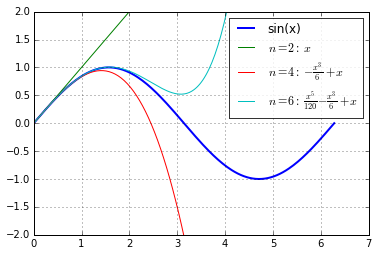

In [6]:
plot_taylor_approximations(sin, 0, [2, 4, 6], (0, 2*pi), (-2,2))


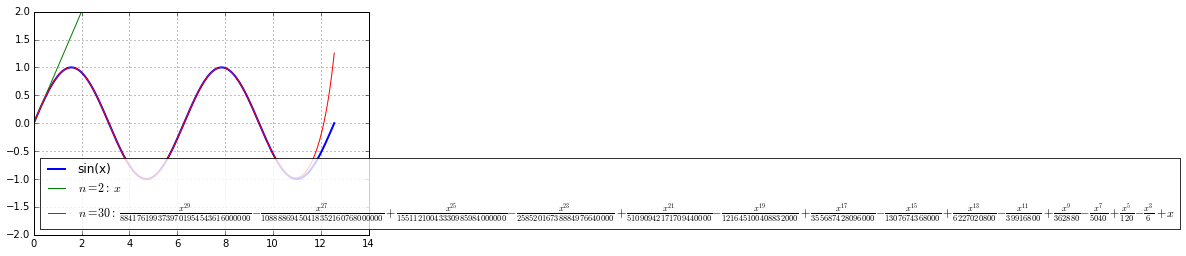

In [7]:
plot_taylor_approximations(sin, 0, [2, 30], (0, 4*pi), (-2,2))

In [8]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
        
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    # plt.legend(loc='best').get_frame().set_alpha(0.8)


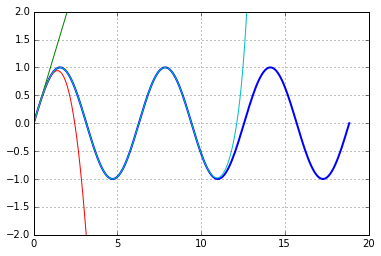

In [9]:
plot_taylor_approximations(sin, 0, [2, 4, 30], (0, 6*pi), (-2,2))


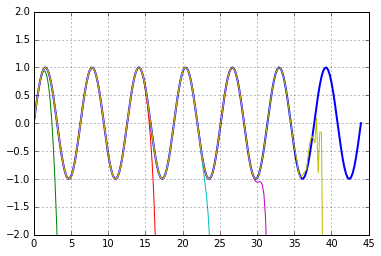

In [10]:
plot_taylor_approximations(sin, 0, [4, 41, 60, 80, 100], (0, 14*pi), (-2,2))